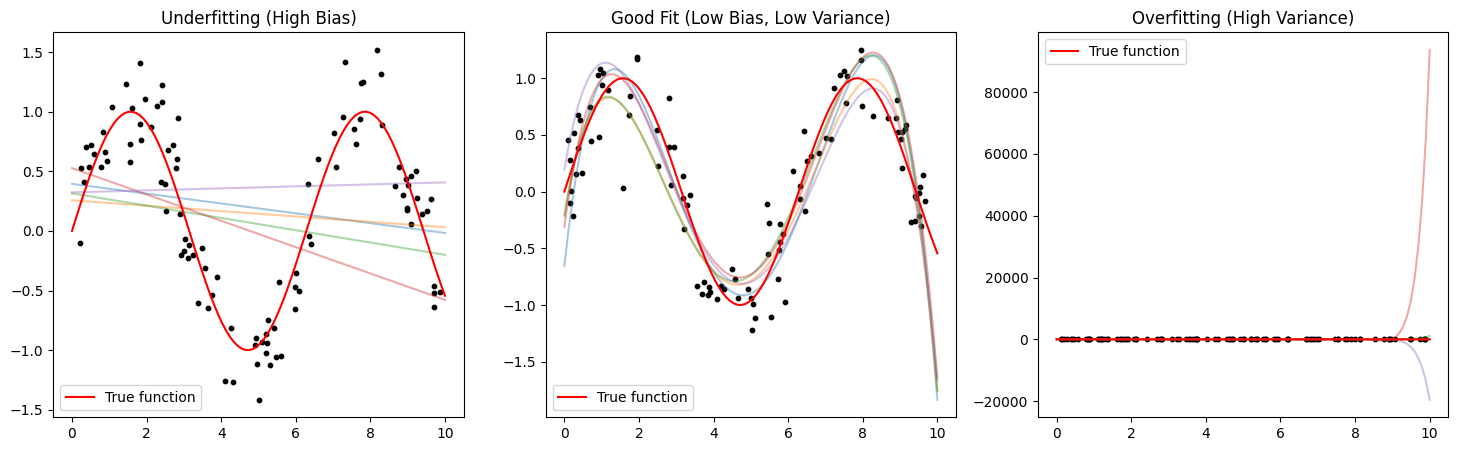

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate true data: y = sin(x)
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = np.sin(x)

# Add noise
def generate_data():
    x_sample = np.sort(np.random.rand(20) * 10)
    y_sample = np.sin(x_sample) + np.random.randn(20) * 0.3
    return x_sample[:, np.newaxis], y_sample

# Function to plot models
def plot_models(degree, ax, title):
    for _ in range(5):  # multiple datasets to show variance
        x_train, y_train = generate_data()
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(x_train, y_train)
        y_pred = model.predict(x[:, np.newaxis])
        ax.plot(x, y_pred, alpha=0.4)
        ax.scatter(x_train, y_train, color='black', s=10)
    
    ax.plot(x, y_true, color='red', label='True function')
    ax.set_title(title)
    ax.legend()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

plot_models(degree=1, ax=axs[0], title='Underfitting (High Bias)')
plot_models(degree=4, ax=axs[1], title='Good Fit (Low Bias, Low Variance)')
plot_models(degree=15, ax=axs[2], title='Overfitting (High Variance)')

plt.show()
